In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
crime = pd.read_csv('Crimes_-_2001_to_Present.csv')
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [3]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# rename some columns 
crime = crime.rename(columns={'Case Number': 'Case_num', 'Primary Type': 'Primary_type', 'Location Description': 'Location_desc', 'Community Area': 'Community_Area', 'FBI Code': 'FBI_Code', 'Updated On': 'Updated_On'})
crime.head()


,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [5]:
crime.Primary_type.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7650199 entries, 0 to 7650198
Series name: Primary_type
Non-Null Count    Dtype 
--------------    ----- 
7650199 non-null  object
dtypes: object(1)
memory usage: 58.4+ MB


In [6]:
# change date format and make it the index
crime.Date = pd.to_datetime(crime.Date, format = '%m/%d/%Y %I:%M:%S %p')
crime.index = pd.DatetimeIndex(crime.Date)

In [7]:
crime['Primary_type'] = pd.Categorical(crime['Primary_type'])
crime['Description'] = pd.Categorical(crime['Description'])
crime['Location_desc'] = pd.Categorical(crime['Location_desc'])

In [8]:
#number of null entries per feature
missing_values = list(crime.isna().sum())

cols = list(crime.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # making a dicionary for the missing values

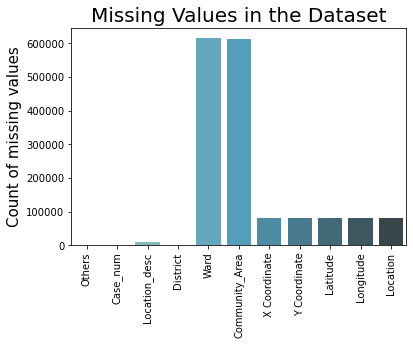

In [9]:
# Plotting the missing values in the dataset
x = list(d.keys())
y = list(d.values())
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Missing Values in the Dataset", fontdict = {'fontsize': 20})
plt.ylabel("Count of missing values", fontdict={'fontsize': 15})
plt.show()

#### We can see that all the features that have a large count of missing values are features that relate to the geographical location of the crime scene. The Chicago Crime Dataset is based on first hand accounts of people involved in or around the crime, not necessary that such first hand reports need to contain the specific locations of the crime.

#### Since, these features are not direct numeric values, we can't use summary statistical functions to fill in the missing values. So we will be removing these values from the dataset.

In [10]:
crime = crime.dropna()
crime.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6956012 entries, 2015-09-05 13:30:00 to 2022-07-01 10:45:00
Data columns (total 22 columns):
 #   Column          Dtype         
---  ------          -----         
 0   ID              int64         
 1   Case_num        object        
 2   Date            datetime64[ns]
 3   Block           object        
 4   IUCR            object        
 5   Primary_type    category      
 6   Description     category      
 7   Location_desc   category      
 8   Arrest          bool          
 9   Domestic        bool          
 10  Beat            int64         
 11  District        float64       
 12  Ward            float64       
 13  Community_Area  float64       
 14  FBI_Code        object        
 15  X Coordinate    float64       
 16  Y Coordinate    float64       
 17  Year            int64         
 18  Updated_On      object        
 19  Latitude        float64       
 20  Longitude       float64       
 21  Location        objec

In [11]:
count = crime[['Primary_type']]

In [12]:
crime_count = pd.DataFrame(count.groupby('Primary_type').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count.head()

,Primary_type,counts
0,THEFT,1471635
1,BATTERY,1279284
2,CRIMINAL DAMAGE,796892
3,NARCOTICS,666676
4,ASSAULT,455091


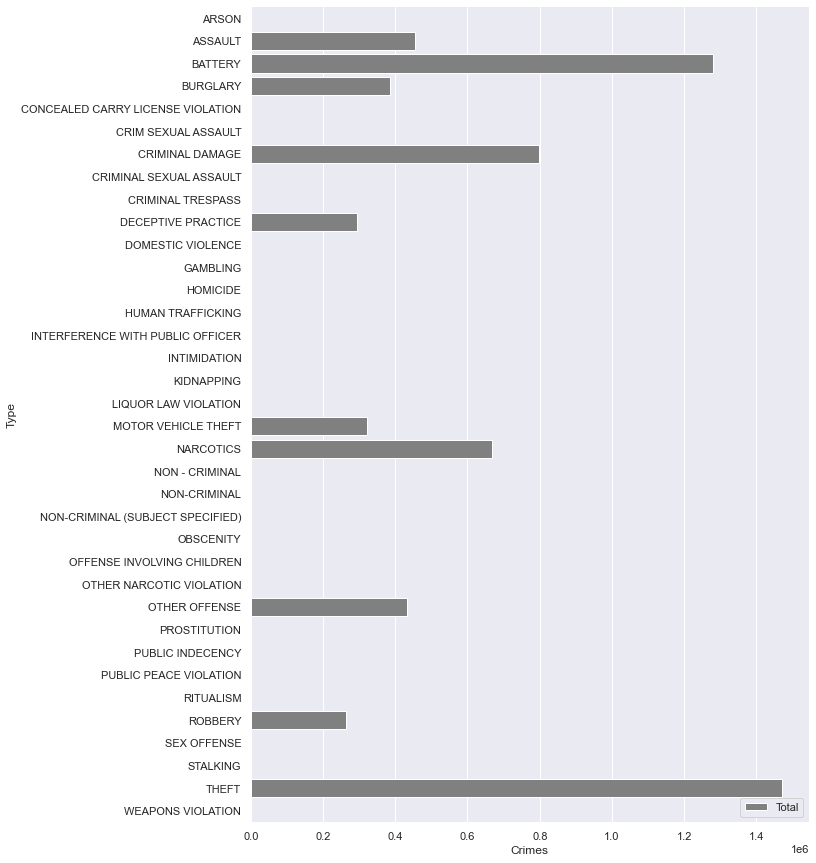

In [13]:
# crime count graph
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(10, 15))
sns.set_color_codes("pastel")
sns.barplot(y="Primary_type", x="counts", data=crime_count.iloc[:10, :],label="Total", color="grey")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",xlabel="Crimes")
sns.despine(left=True, bottom=True)
plt.show()

In [14]:
b = pd.DataFrame(crime ,columns=['Primary_type','Arrest'])

In [15]:
domestic_count1 = pd.DataFrame(b.groupby(['Primary_type','Arrest']).size().sort_values(ascending=False).rename('counts').reset_index())
domestic_count1


,Primary_type,Arrest,counts
0,THEFT,False,1309511
1,BATTERY,False,996613
2,CRIMINAL DAMAGE,False,743782
3,NARCOTICS,True,662613
4,BURGLARY,False,364604
...,...,...,...
67,NON-CRIMINAL (SUBJECT SPECIFIED),True,3
68,RITUALISM,True,2
69,PUBLIC INDECENCY,False,2
70,DOMESTIC VIOLENCE,True,0


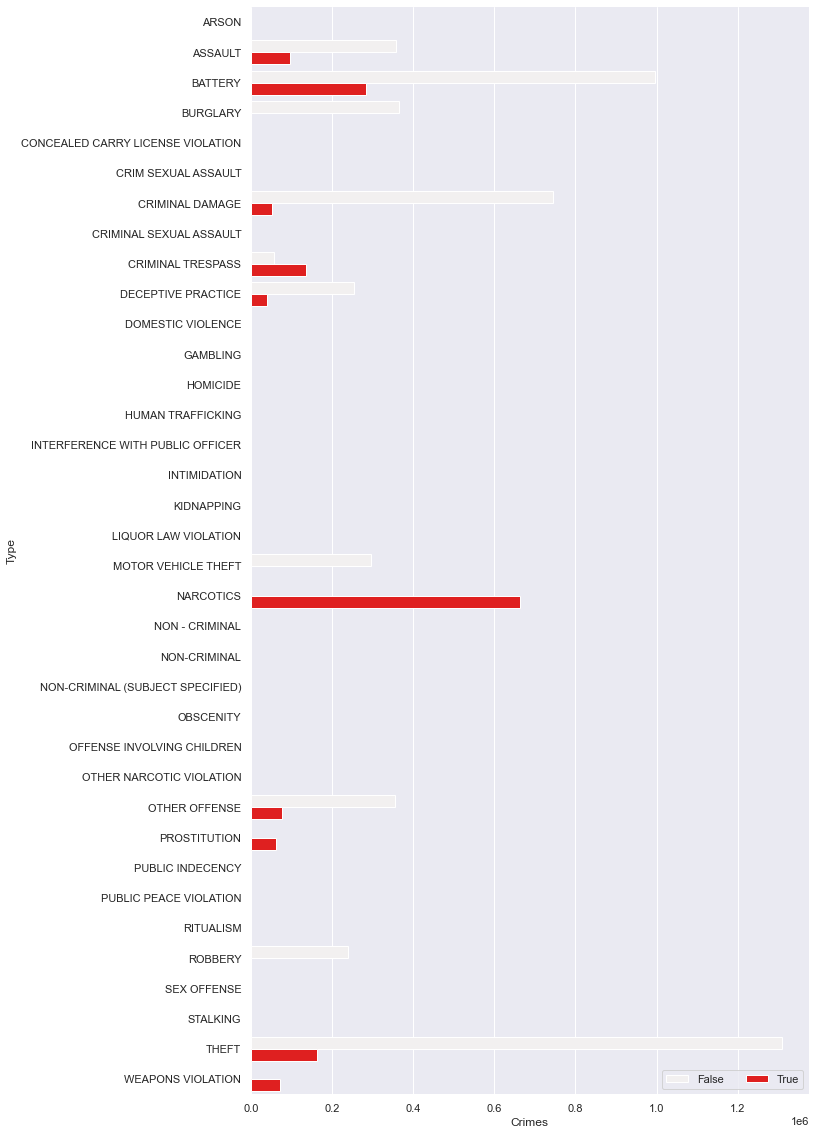

In [16]:
# bar chart to show arrest for crimes 
f, ax = plt.subplots(figsize=(10,20))

# Plot the total crashes
sns.set_color_codes("deep")
sns.barplot( y="Primary_type",x="counts" , data=domestic_count1.iloc[:20, :], hue='Arrest', color='red')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",xlabel="Crimes")
sns.despine(left=True, bottom=True)

### how often do domestic cases end in an arrest?

There are a total of 7,650,199 domestic cases in this dataset, out of all of those 199,064 end in an arrest

In [17]:
# make boolean column if domestic case results in arrest 
crime['domestic_arrest'] = (crime['Domestic']== True) & (crime['Arrest']== True)
crime.head()

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location,domestic_arrest
Date,,,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",False
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",False
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",False
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",False
2015-09-05 10:55:00,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)",False


In [18]:
crime.domestic_arrest.value_counts()

False    6772705
True      183307
Name: domestic_arrest, dtype: int64

narcotics have 744,216 and out of those 739,782 arrests 

In [19]:
crime['narco_arrest'] = np.where((crime['Primary_type'] == 'NARCOTICS') & (
    crime['Arrest'] == True), 1, 0)

In [20]:
crime.narco_arrest.value_counts()

0    6293399
1     662613
Name: narco_arrest, dtype: int64

How many beats per community area?

In [21]:
crime.Beat.nunique()

303

In [22]:
crime.head()

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location,domestic_arrest,narco_arrest
Date,,,,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",False,0
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",False,0
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",False,1
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",False,0
2015-09-05 10:55:00,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)",False,0


In [23]:
crime.isnull().sum()

ID                 0
Case_num           0
Date               0
Block              0
IUCR               0
Primary_type       0
Description        0
Location_desc      0
Arrest             0
Domestic           0
Beat               0
District           0
Ward               0
Community_Area     0
FBI_Code           0
X Coordinate       0
Y Coordinate       0
Year               0
Updated_On         0
Latitude           0
Longitude          0
Location           0
domestic_arrest    0
narco_arrest       0
dtype: int64

### How often do Crimes occur?

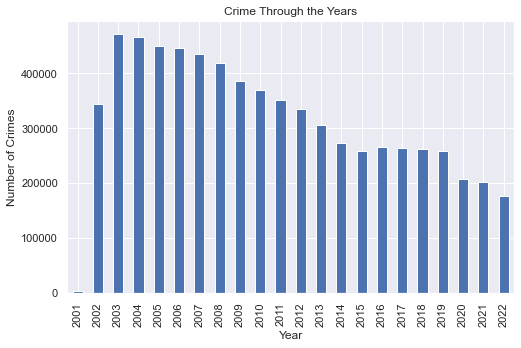

In [24]:
plt.figure(figsize = (8,5))
crime.groupby([crime.index.year]).size().plot.bar()
plt.title('Crime Through the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

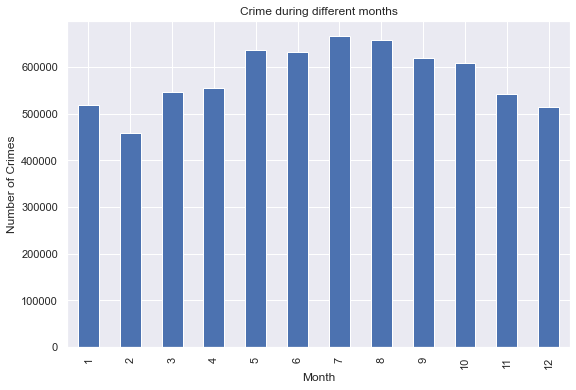

In [25]:
plt.figure(figsize = (9,6))
crime.groupby([crime.index.month]).size().plot.bar()
plt.title('Crime during different months')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

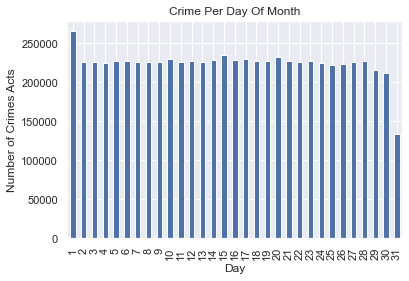

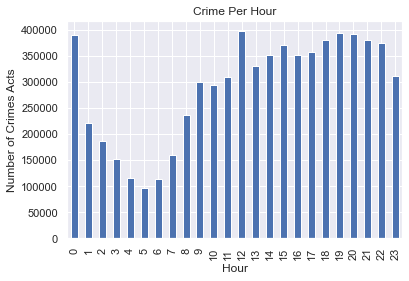

In [26]:
crime.groupby([crime.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()

crime.groupby([crime.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [27]:
crime_2012 = crime.loc['2012']
crime_2013 = crime.loc['2013']
crime_2014 = crime.loc['2014']
crime_2015 = crime.loc['2015']
crime_2016 = crime.loc['2016']
crime_2017 = crime.loc['2017']
arrest_yearly = crime[crime['Arrest'] == True]['Arrest']

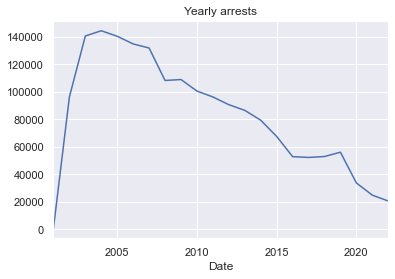

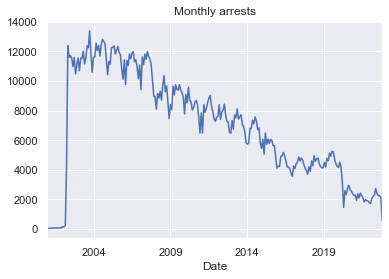

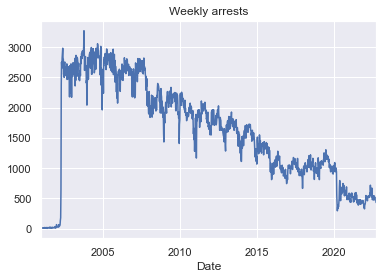

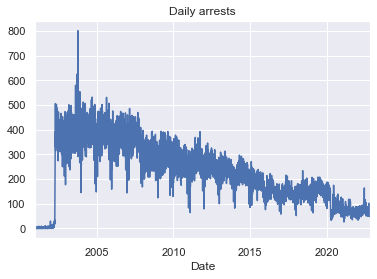

In [28]:
plt.subplot()

# yearly arrest
arrest_yearly.resample('A').sum().plot()
plt.title('Yearly arrests')
plt.show()

# monthly arrest
arrest_yearly.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()

# weekly arrest
arrest_yearly.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()

# daily arrest
arrest_yearly.resample('D').sum().plot()
plt.title('Daily arrests')
plt.show()
plt.show()

You can see a dip in crimes for 2020 when covid started and a spike in crimes on a certain day in 2003. 

In [ ]:
# daily arrest
arrest_yearly.resample('D').sum().nlargest(10)

In [ ]:
crime.head()

In [ ]:
# look at the date of the spikes 
df2 = crime.loc['2003-10-16':'2003-10-17']
df2.head()

In [ ]:
df2.Primary_type.value_counts()

In [ ]:
# look at the date of the spikes 
df3 = crime.loc['2003-10-16']
df3.head()

In [ ]:
df3.Primary_type.value_counts()

In [ ]:
df4 = crime.loc['2003-10-17']
df4.head()

In [ ]:
df4.Primary_type.value_counts()

### percentage of arrests 

In [ ]:
# Convert values into percentages
arrest_df = crime['Arrest'].value_counts()
arrest_percent = (arrest_df / crime['Arrest'].sum()) * 100 

arrest_percent.rename("% of Arrests",inplace=True)

#Rename True and False to % Arrested and % Not Arrested
arrest_percent.rename({True: '% Arrested', False: '% Not Arrested'},inplace=True)

In [ ]:
#pie chart to show percentage and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#plot results in a pie chart
arrest_percent.plot.pie(fontsize=11,
                       autopct=make_autopct(crime['Arrest'].value_counts()),
                       figsize=(8, 8))


In [ ]:
## Group dataset by year and arrests
arrest_per_year = crime.groupby('Year')['Arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

In [ ]:
crime.head()

In [ ]:
# calculating total number of incidents per district
district_crime = crime['District'].value_counts(ascending=True)

district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

# Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [ ]:
crime.head()

In [ ]:
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=crime[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           height=10,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")